In [24]:
import sys
import tensorflow as tf
from PIL import Image  # Pillow module
from model import make_model,SuperResolutionModel

In [25]:
model=make_model(320,240)

Model: "super_resolution_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (1, 320, 240, 8)          224       
                                                                 
 sequential_4 (Sequential)   (1, 320, 240, 8)          584       
                                                                 
 sequential_5 (Sequential)   (1, 640, 480, 3)          219       
                                                                 
Total params: 1,027
Trainable params: 1,027
Non-trainable params: 0
_________________________________________________________________


In [26]:
MAX_PEL_VALUE=255

In [27]:
# jpg이미지를 받으면 열어서 텐서로 바꿔서 리턴
def load_jpg(filename, low_res=False):
    image = Image.open(filename)
    if low_res:
        image_vga = image.resize((240, 320)) 
    else:
        image_vga = image.resize((480, 640))
    image.close()
    
    return tf.convert_to_tensor(image_vga, tf.float32)

In [28]:
## model과 인풋이 들어오면 sr을 한 numpy 배열 보냄
def get_output(model,input):
    out_ = model(input[tf.newaxis])
    out = tf.clip_by_value(out_, 0, MAX_PEL_VALUE)

    return out[0]

In [29]:
def test(input_file):
    inp_lr = load_jpg(input_file, True)
    out_hr = get_output(model,inp_lr)
    return tf.cast(out_hr, tf.uint8).numpy()

In [30]:
out_hr=test('test_image.jpg')

In [31]:
out_hr

array([[[ 4, 16,  1],
        [ 2, 15,  1],
        [ 1, 13,  1],
        ...,
        [12, 22,  7],
        [ 8, 14,  2],
        [ 4,  9,  0]],

       [[ 3, 15,  2],
        [ 2, 14,  1],
        [ 1, 12,  1],
        ...,
        [11, 21,  8],
        [ 5, 14,  4],
        [ 3, 10,  0]],

       [[ 4, 14,  3],
        [ 4, 13,  2],
        [ 2, 10,  1],
        ...,
        [11, 22,  9],
        [ 4, 14,  4],
        [ 2, 11,  0]],

       ...,

       [[26, 41,  9],
        [18, 33,  9],
        [ 4, 17,  4],
        ...,
        [ 3,  5,  0],
        [ 3,  5,  0],
        [ 2,  5,  0]],

       [[22, 33,  7],
        [14, 27,  8],
        [ 2, 12,  4],
        ...,
        [ 3,  7,  0],
        [ 3,  7,  1],
        [ 2,  6,  1]],

       [[18, 30,  6],
        [12, 24,  7],
        [ 3,  9,  4],
        ...,
        [ 4,  9,  1],
        [ 3,  8,  1],
        [ 2,  8,  1]]], dtype=uint8)

In [32]:
#nump배열을 다시 이미지로 변환
out_image =Image.fromarray(out_hr)

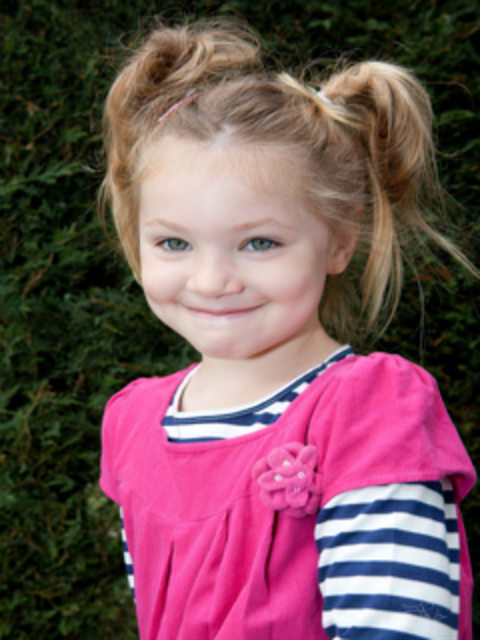

In [33]:
out_image